<p style="font-family: Arial; font-size:4.05em; color:darkblue; font-style:bold"><br>
Intelligent Data Analysis</p><br>

## Part I - Exploratory Analysis \#79  
Pavol Grofčík  
Dennis Sobolev

In [1]:
#Importing of used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Showing graphs in a browser env
%matplotlib inline

<p style="font-family: Arial; font-size:2.95em; color:purple; font-style:bold"><br>
Content</p><br>

## Sections  
Analysis of each train dataset is divided into sections, shown below
* __Introduction__
* __Personal_train__
    * Reading & descriptive statistics upon data
    * Datatypes and values
    * Column distributions
    * Revealing intentional faults  
    
* __Other_train__
    * Reading & descriptive statistics upon data
    * Datatypes and values
    * Revealing intentional faults
    * Column distributions 
    * Formulated Hypotheses and correlations - descriptive
    * Formulated Hypotheses - statistically confirmed
    * Interesting data


<p style="font-family: Arial; font-size:2.95em; color:orange; font-style:bold"><br>
Introduction</p><br>

**Thyroid disease (THD)** is disease that affects mainly Thyroid gland - butterfly-shaped gland in the front of the neck (see below) and stimulates hormones production, which is important for body in a way it controls metabolism and other hormone production, even your heartbeats.  
Symptoms of the disease vary depending on the type. In general, there are two main types:
> **Hypothyroidsm** - as result of hormone deficit  
> **Hyperthyroidsm** - as result of hormone overproduction  


![image](http://wholehealthweb.com/wp-content/uploads/2016/11/bigstock-d-rendered-medically-accurat-136052459-thyroid-627x376.jpg)

Image source: http://wholehealthweb.com/wp-content/uploads/2016/11/bigstock-d-rendered-medically-accurat-136052459-thyroid-627x376.jpg

### Hypothyroidism
Your thyroid does not make enough thyroid hormones. It is also called underactive thyroid. This slows down many of your body's functions, like your metabolism.

In order to prevent Hypothyroidsm, our hypophysis located in front cerebral, stimulates production of TSH - *thyroid stimulating hormone*, which affects secretion of T4 hormone, which divides into two types: 
> **TT4** - Total amount  
> **T4U** - Unbound amount

### Hyperthyroidsm  
Means overactivation of thyroid, causes thyroid gland to make more thyroid hormone than organism needs. This speeds up many of body functions, like metabolism and heart rate, but at this rate, hyperproduction causes various disfunctions in organism.

**In this analysis, we will explore two datasets, which contain personal information and results of medical analysis for patients with possible thyroid disfunctions. Our main points of interest are mostly hormone levels and possible correlations between various factors, which could signal, if there are dependencies between them, that could lead to certain Thyroid gland disfunction diagnosis with a sufficiently high probability.**

**After that, we will test proposed hypotheses to prove and verify those correlations and dependencies based on medical literature & physician's utterance.**

<p style="font-family: Arial; font-size:2.95em; color:purple; font-style:bold"><br>
Personal_train dataset</p><br>

### Reading & descriptive statistics

In [2]:
#Reading the dataset file and loading it into work environment. First brief look on the beginning of dataset.
df_personal = pd.read_csv("Datasets/personal_train.csv", index_col=0)
df_personal.head()

,name,address,age,sex,date_of_birth
0,Terry Terry,"11818 Lori Crossing Apt. 802\r\nPughstad, DC 7...",68.0,M,1949-11-16
1,Edith Boudreaux,"PSC 4657, Box 5446\r\nAPO AP 58412",75.0,F,1943-08-10
2,Stephen Lalk,Unit 9759 Box 9470\r\nDPO AP 45549,67.0,M,1951-05-28
3,Abraham Bruce,"137 Lewis Flat Suite 762\r\nWest Elizabeth, AL...",34.0,?,1984-02-13
4,Janet Washington,"995 Frank Stravenue\r\nSouth Matthewport, TX 8...",65.0,F,1953/06/24


In order to get some basic information about the dataset, that we have just read, we need to use the **Info()** command.

Here it shows us overall number of records and columns, column names and datatypes, and absent (*NULL*) values in **age** and **date_of_birth** columns, as we can see below.

In [3]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 5 columns):
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), object(4)
memory usage: 104.9+ KB


## Column distributions & analysis

Here we will get some basic statistics about numeric columns: number of values in each, mean, min/max values, standard deviation and quartile values. 

In [4]:
df_personal.describe()

,age
count,2236.000000
mean,51.822004
std,20.884439
min,1.000000
25%,36.000000
50%,54.000000
75%,67.000000
max,455.000000


As we may see, there already are strange values in column, because usually human beings don't live 455 years (see **max** value). Let's take a look on graphical representation - there we will be able to see, if there are some anomalies or outliers in values.

In [5]:
stats = df_personal.age.describe().dropna()

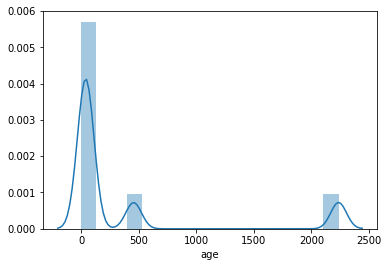

In [6]:
sns.distplot(stats)

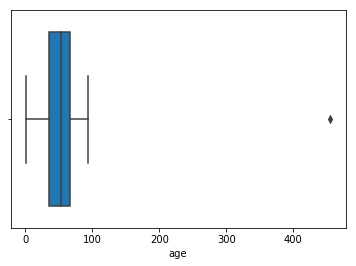

In [7]:
sns.boxplot(x = "age", data=df_personal.dropna(),saturation=True)

In [8]:
#Probably an outlier in the right parf of boxplot graph
max(df_personal.age)

455.0

Yes, there definitely are outliers, so we might possibly clean those during deeper analysis for the next part of project. For now we should not do any detailed data preparation or cleaning, so we are allowed operate only with existing values using temporary filters, except most significant parts of datasets, which require cleaning by default.

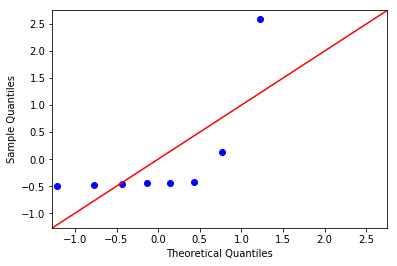

In [9]:
_ = sm.ProbPlot(stats,fit=True).qqplot(line='45')

In the pictures above, we can see **uneven distribution** of values from the Age column. From QQ plot visualization, we can assume right skewed distribution, which holds true(See sns.displot graph). Also there is an **outlier** in the right part of boxplot, which lies in the abnormal distance from others (we have already discovered, that it is our maximal value of 455 years).

Let's proceed further:

In [10]:
df_personal.date_of_birth.value_counts().head(15)

1945-09-13    4
1948-04-26    3
1977-04-29    2
1948-05-17    2
1955-10-14    2
1975-03-07    2
1953-05-08    2
1990-06-27    2
1990-04-26    2
1941-09-19    2
1985-03-03    2
1966-12-14    2
1971-11-08    2
1948-02-03    2
1964-01-15    2
Name: date_of_birth, dtype: int64

Here we can see, that **date_of_birth** column format is *dirty*, there are various types of date format, even with time - datetime, so we should be ready to clean that mess up by providing sole unified format for those values.

Also, in the **name** column we see duplicated names for _**Terry Murphy**_:

In [12]:
df_personal.name.value_counts().head()

Terry Murphy    2
Rafael Allen    1
Ashley Glenn    1
Edna Saville    1
Joe Haro        1
Name: name, dtype: int64

In [13]:
df_personal[df_personal['name']=='Terry Murphy']

,name,address,age,sex,date_of_birth
626,Terry Murphy,"15269 Mary Street\r\nNorth Scott, KY 73882",73.0,F,1945-09-13
1024,Terry Murphy,"284 Prince Wells\r\nLoweside, DC 22033",73.0,?,1945-01-17


But they are just two different people with same names. It's not an error or dirtied data, but we should also pay attention to such cases in real life data and possibly use not only name, but also an address as unique patient ID for further processing and/or dataset merging.

<p style="font-family: Arial; font-size:2.95em; color:orange; font-style:bold"><br>
Other_train dataset</p><br>

### Reading & descriptive statistics

Same as for dataset above.

In [14]:
df_other = pd.read_csv("Datasets/other_train.csv", index_col=0)
df_other.head()

,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,John Kasprzak,"3856 Kayla Track\r\nLake Sara, HI 31241",f,t,HS-grad,f,118.0,1.42,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Craft-repair,f,?,White,83
1,Stephen Harvey,"34782 Kayla Field\r\nSarahmouth, VT 75984",f,t,HS-grad,f,112.0,1.03,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",FALSE,other,-900.0,Adm-clerical,f,?,White,109
2,Paul Moe,USNV Mooney\r\nFPO AE 29375,f,t,Some-college,f,87.0,0.96,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,10.0,Other-service,f,?,White,90
3,Sarah Johnson,"3633 Bryan Isle\r\nNorth Jamesshire, HI 69484",f,t,Doctorate,f,102.0,0.85,0.0,0.0,...,f,"{'query hypothyroid':'t','T4U measured':'t','p...",f,SVI,16.0,Prof-specialty,f,?,White,119
4,Stacy Martinson,65701 Choi Course Apt. 280\r\nNorth Williamton...,f,t,Some-college,f,129.0,0.97,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,SVI,10.0,Other-service,f,?,White,133


In [15]:
df_other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2287 entries, 0 to 2286
Data columns (total 33 columns):
name                         2287 non-null object
address                      2287 non-null object
query hyperthyroid           2277 non-null object
FTI measured                 2278 non-null object
education                    2280 non-null object
lithium                      2277 non-null object
TT4                          2125 non-null float64
T4U                          2042 non-null float64
capital-loss                 2049 non-null float64
capital-gain                 2282 non-null float64
tumor                        2277 non-null object
TSH                          2040 non-null float64
T3                           1805 non-null float64
fnlwgt                       2279 non-null float64
hours-per-week               2278 non-null float64
relationship                 2278 non-null object
sick                         2277 non-null object
workclass                    2140 n

Here we have much more absent values, so it would be good to see, how many exactly:

In [16]:
df_other.isnull().sum()

name                           0
address                        0
query hyperthyroid            10
FTI measured                   9
education                      7
lithium                       10
TT4                          162
T4U                          245
capital-loss                 238
capital-gain                   5
tumor                         10
TSH                          247
T3                           482
fnlwgt                         8
hours-per-week                 9
relationship                   9
sick                          10
workclass                    147
TT4 measured                   9
class                          8
marital-status                10
goitre                         8
native-country                 6
hypopituitary                  8
medical_info                  10
on antithyroid medication      9
referral source               11
education-num                 10
occupation                    13
TBG measured                   7
TBG       

As we see, there is significant amount of absent data, so we will need to deal with it in future parts of this project. But for now it would be enough to just discard all absent values in order to get quick statistics, as the amount of absent data is rather big, but not crucially.

The columns of this dataset are far more interesting, so let's tell a pair of words about each:

>  1) TT4 (total T4), T4U (unbound part of T4), T3 - Thyroid hormones;  
>  2) TSH - pituitary hormone, used to stimulate prodution of hormones above;  
>  3) FTI - free Thyroxine index - related to Thyroid hormones;  
>  4) medical_info, on antithyroid medication, lithium - dirtied data about therapy and medical tests taken;  
>  5) Tumor, goitre - are symptoms and effects of Thyroid disfunction;  
>  6) class - contains the diagnosis we look for: **increased binding protein** means thyroid **hyper**function, **decreased** - **hypo**function, **negative** - normal function;  
>  7) capital-gain/loss - financial gain and loss by person (e.g., wealth);  
>  8) fnlwgt - possibly demographic, economical and social class grouping, used in USA, but needs to be checked further;  
>  9) referral source - possibly nearest hospital, where the medical tests were taken;  
>  10) sick - possibly other illness the person experienced during examination;  
>  11) TBG, TBG measured - Thyroxine binding globulin, no present values at all, so for now - ignore;  
>  12) all other columns are rather self-explanatory.  

So, let's check, if there is a name duplicity as in previous dataset:

In [17]:
df_other.name.value_counts().head(10)

Marcus Haecker     2
Janet Robichaud    2
Harold Miller      2
Charlene Hurd      2
Jeanette Wing      2
Ann Hernandez      2
Matthew Capps      2
Michael Green      2
Ramona Roberts     2
Kimberly Seacat    2
Name: name, dtype: int64

Yes, and there are more records with the same name value. Let's check, if there really is a record duplicity or just same names (as in **Personal_train** dataset).

In [18]:
df_other[df_other['name']=='Sandra Stcyr']

,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
330,Sandra Stcyr,"3742 Lawrence Port Apt. 530\r\nMorrisberg, PA ...",f,t,HS-grad,f,133.0,1.1,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,-900.0,Other-service,f,?,White,121
1047,Sandra Stcyr,"3742 Lawrence Port Apt. 530\r\nMorrisberg, PA ...",f,t,NaN,f,133.0,1.1,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,NaN,-900.0,Other-service,f,?,White,121


Yes, there are record duplicates with lost data between them. A possible solution of this problem lies in dropping duplicate records and leaving only **one** of them, which contains most data. A better solution, though, is to merge two duplicate records into one in order to accumulate all non-empty column values so that we get as much info from both as we can.

## Revealing intentional faults

It is known, that our datasets have dirty data, so we should find those and correct them in future parts of our project.

Let's begin from **education-num** column:

In [19]:
df_other[['education','education-num']].head(30)

,education,education-num
0,HS-grad,9.0
1,HS-grad,-900.0
2,Some-college,10.0
3,Doctorate,16.0
4,Some-college,10.0
5,Assoc-acdm,12.0
6,Bachelors,13.0
7,Bachelors,1300.0
8,Some-college,10.0
9,Masters,14.0


As we may see from the output above, there are some possible dependencies between numbers in column **education-num** and values in column **education**.

Let's test our assumption by getting the most often used value for each category in **education**:

In [21]:
df_other["education-num"].describe()

count    2277.000000
mean        8.742644
std       331.789219
min     -1600.000000
25%         9.000000
50%        10.000000
75%        12.000000
max      1400.000000
Name: education-num, dtype: float64

Bingo. No values lesser or more than -1600 and 1600, so our assumption may be right. This info is enough for us to create a solution for futher data cleaning: we should try to divide outliers by 100 and get rid of (-), where necessary.

Now, let's take a look on visual representation and see, if it is normally distributed:

In [22]:
education_num = df_other["education-num"].dropna().describe()

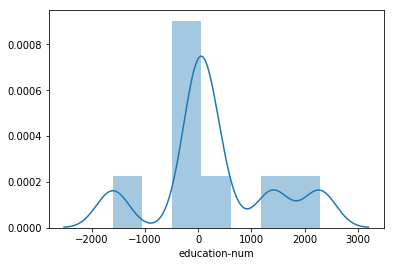

In [23]:
sns.distplot(education_num,kde=True)

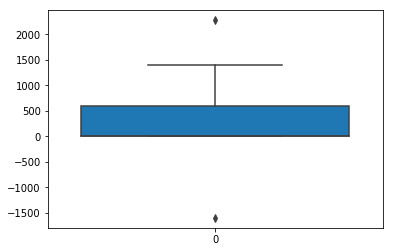

In [24]:
sns.boxplot(data=education_num,saturation = True)

As it is seen, if we ignore outliers, **Education-num** is normally distributed.

Now, to next fault: we have rather strange outlier numbers in **capital-gain** column, which is beter seen in graphs:

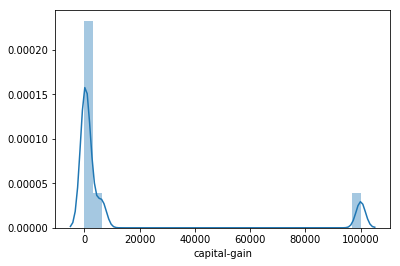

In [25]:
capt_gain = df_other["capital-gain"].dropna().describe()
sns.distplot(capt_gain)

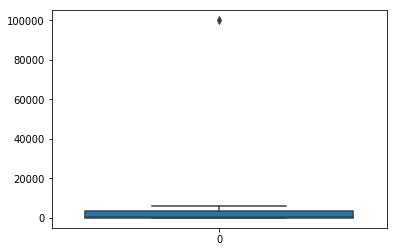

In [26]:
sns.boxplot(data=capt_gain,saturation=True)

From the graphs above, we can *see high level of variance* of **Capital-gain** column, which we assume to be an intentional fault, just as we assumed above.

Next fault!

Incorrect format of True/False values in **on antithyroid medication** column.  
Proposed solution for this problem is in normalization as follows:

> **f,f.2,FALSE** for F  
> **t,TRUE** for T  
> **nan** - dropout or include to results at the end of observation

In [27]:
print(df_other["on antithyroid medication"].unique())

['f' 'FALSE' 'F' 'f.2' nan 'T' 't' 'TRUE']


Futher dirtiness in data: 

**Medical_info** column: as we can see, it is **JSON** format, so we will have to split it into many columns using json encoder

In [28]:
print(df_other["medical_info"].head())

0    {'query hypothyroid':'f','T4U measured':'t','p...
1    {'query hypothyroid':'f','T4U measured':'t','p...
2    {'query hypothyroid':'f','T4U measured':'t','p...
3    {'query hypothyroid':'t','T4U measured':'t','p...
4    {'query hypothyroid':'f','T4U measured':'t','p...
Name: medical_info, dtype: object


Incorrect format in **workclass** column: questionmarks - **'??',' ?'** and whitespaces. 
Also, it is worth to mention **underscore** at the very beginning of the items.

Solution: replace "?" with NaN values and get the format to lowercase without spaces.

In [29]:
print(df_other["workclass"].unique())

[' Private' nan '??' ' ?' ' Self-emp-not-inc' ' Local-gov' ' State-gov'
 ' Self-emp-inc' 'federal-gov' 'private' ' Federal-gov' 'local-gov' '?'
 'self-emp-not-inc' 'Nan' 'state-gov' 'self-emp-inc' ' Without-pay']


Most interesting column - **class**, as it contains the diagnosis we seek: thyroid hyperfunction, thyroid hypofunction ar no disfunction at all. The format is dirtied, so we should split the column into two - one with diagnosis and one with numbers (we don't know, what are they, so let's just store them for future analysis).
Stripping will be based on '.|' and '.\_' as delimiters.

In [30]:
print(df_other["class"].value_counts().tail(10))

negative.|2299                     1
negative.|3148                     1
negative.|2253                     1
negative.|3186                     1
negative.|2193                     1
negative.|1809                     1
increased binding protein.|313     1
negative.|2802                     1
negative.|3667                     1
increased binding protein.|2276    1
Name: class, dtype: int64


## Column distributions & Hormone analysis

![synapsa](https://www.charlottesbook.com/wp-content/uploads/2014/10/hormones-skincare.jpg)

Image source: https://www.charlottesbook.com/wp-content/uploads/2014/10/hormones-skincare.jpg

So, as it was told before, there are 3 hormones, that are importnant for us in all thyroid cycle:

>  1) **TSH** - a hormone, produced by pituitary gland. It forces Thyroid gland to synthesise more thyroxine hormone (T4). The lower amounts of T4 are present in organism, the more TSH is produced to amplify its production;  
>  2) **T4** - thyroxine, primary interesting hormone of Thyroid gland. Is represented here by 2 columns: **TT4** - total T4 (both bound to proteins and unbound), and **T4U** - free T4 (unbound). Most thyroid problems could be diagnosed by looking at their levels and their relation to TSH value;  
>  3) **T3** - triiodthyronine, a thyroid hormone, mostly produced outside Thyroid gland and mostly from present T4 by its deiodization as a secondary product. It also may be an indicator of thyroid disfunction, however, not so representative as T4 - sometimes it is the last hormone to change its value.  

Unfortunately, there are many other factors, such as gender, age, amount of stress in life and work, pregnancy, amount of iod in organism, some types of medication, that dictate a different normal hormone values for each individual case. As we could see before, many of those factors are present in our datasets, so we may later create a strict st of rules for machine to learn from, but surely, without qualified endocrinologist it is impossible to diagnose Thyroid disfunction correctly with _really acceptable_ level of reliability.

First, let's take a look on hormone values distribution:

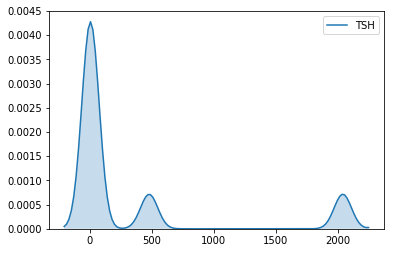

In [31]:
tsh = df_other["TSH"].dropna().describe()
sns.kdeplot(tsh,shade=True)

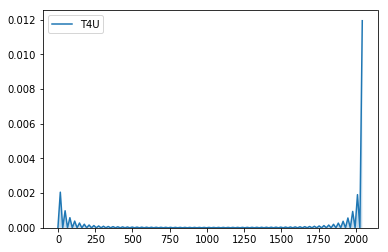

In [32]:
t4u = df_other["T4U"].dropna().describe()
sns.kdeplot(t4u,shade=True)

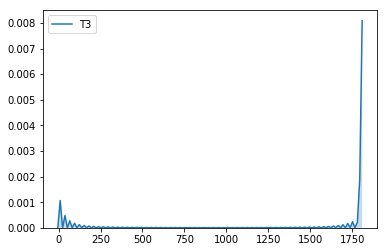

In [33]:
t3 = df_other["T3"].dropna().describe()
sns.kdeplot(t3,shade=True)

## Preprocessing a class column

Then, let's make use of our diagnosis classifier column:

In [34]:
df_other["class"].head()

0    increased binding protein.|2384
1                      negative.|358
2                     negative.|1247
3                     negative.|1829
4                     negative.|3531
Name: class, dtype: object

In [35]:
df_other["class"] = df_other["class"].str.replace("_","")
df_other["class"] = df_other["class"].str.replace("|", "")
df_other["class"].head()

0    increased binding protein.2384
1                      negative.358
2                     negative.1247
3                     negative.1829
4                     negative.3531
Name: class, dtype: object

In [36]:
df_other[["class", "class_protein"]] = df_other["class"].str.split(".",expand = True)
df_other[["class", "class_protein"]].head()

,class,class_protein
0,increased binding protein,2384
1,negative,358
2,negative,1247
3,negative,1829
4,negative,3531


We don't have much data for present disfunctions, but we might still be able to detect some dependencies:

In [37]:
df_other["class"].value_counts()

negative                     2173
increased binding protein      97
decreased binding protein       9
Name: class, dtype: int64

And now, let us try to get some interesting visualization of our still dirtied data (unclean due to requirements of current part of task):

Text(0.5,1,'Hormone TSH vs T4U Correlation')

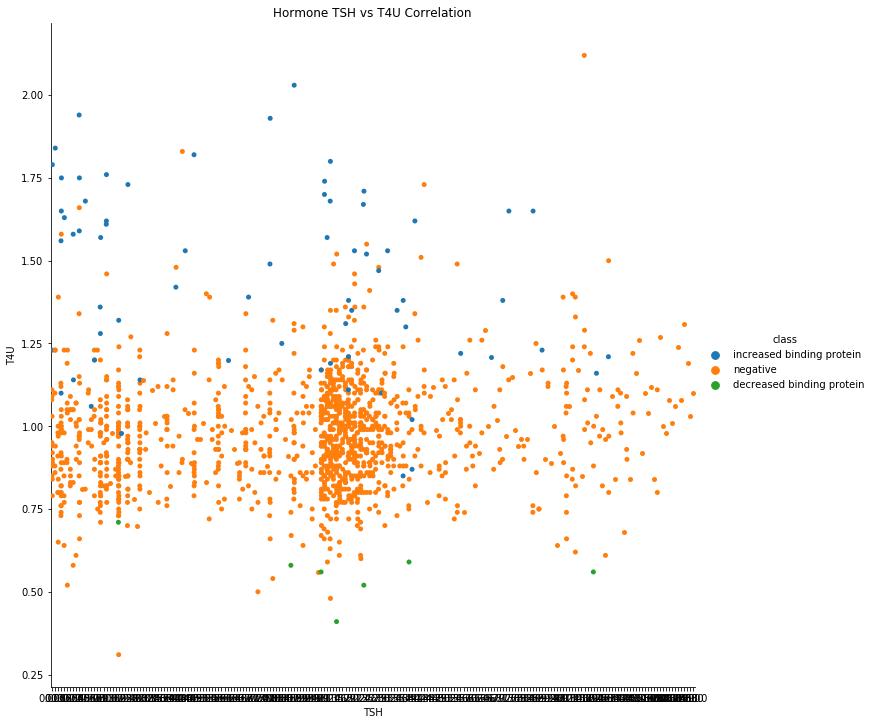

In [38]:
sns.catplot(x="TSH", y="T4U", hue = "class", data=df_other.dropna(),height=10)
plt.title("Hormone TSH vs T4U Correlation")

Here we may see, that there are many scattered and rather various data to process, so our only first assumption could be that ***decraesed and increased binding protein could mostly be diagnosed not by TSH level, but by T4U*** - all ***decreased binding protein*** is under **T4U** value of **0.75**, when ****increased binding protein*** has much more variety, so we may need further analysis, cleansing and rule creation to define more accurate way to get reliable data.

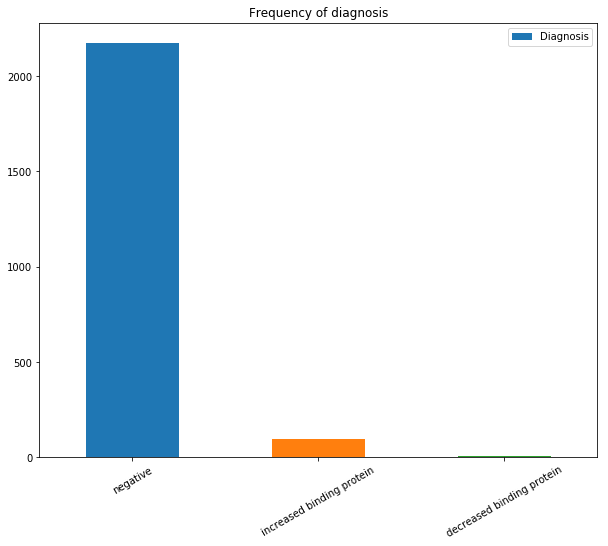

In [39]:
df_other["class"].value_counts().plot(kind='bar', label='Diagnosis', rot=30, figsize=(10,8))
plt.legend()
plt.title('Frequency of diagnosis');

Mostly, there is a negative test that **prevails** over others. But that does not mean that person is healthy, there are also many factors or/and symptoms, such as goitre, tumor or other.

# Formulated hypotheses and correlations - descriptive

Naive hypotheses, described above, are confirmed by a qualified doctor and various sources with different level of reliability, such as Wikipedia or different endocrinology textbooks, such as, but not limited to:
>  1) "Лифшиц В.М. Биохимические анализы в клинике : справочник / В.М. Лифшиц, В.И. Сидельникова ; 2-е изд. – М. : Медицинское информационное агентство, 2001. – 303 с."  
>  2) Назаренко Г.И. Клиническая оценка результатов лабораторных исследований / Г.И. Назаренко, А.А. Кишкун  - М. : Медицина, 2006 – 543 с.  
>  3) McGraw-Hill Manual of laboratory & diagnostic tests /  D.D. Wilson ; 1 ed. – McGraw-Hill Professional, 2007. – 608 pp.  

Now we have to test, if those hypotheses could be confirmed in our data. 

In [40]:
#Dropping one record with glitching data
df_corr=df_other.drop(102)

First of all, let's create a correlation heatmap, which will show us dependencies and correlations between various attributes of our records. The more intense the color is, the more correlation it has and vice versa - fully desaturated cells could represent negative correlation or nocorrelation at all, depending on correlation scale to the right of the heatmap. If minimal value is lesser than 0, then it means, that desaturated colors under certain level have negative correlation. It means, that the more of one attribute we have, the lesser amount of another we will see (_For example: the colder it is outside, the lesser insects we see in nature_).

In [41]:
d = {'negative' : 0, 'increased binding protein' : 1, 'decreased binding protein' : -1}
f = {'f' : 0, 't' : 1}
df_corr['class']=df_corr['class'].map(d)
df_corr['tumor']=df_corr['tumor'].dropna().map(f)
df_corr['goitre']=df_corr['goitre'].dropna().map(f)
df_corr['sick']=df_corr['sick'].dropna().map(f)
df_corr['lithium']=df_corr['lithium'].dropna().map(f)
df_corr['query hyperthyroid']=df_corr['query hyperthyroid'].dropna().map(f)
corr_matrix = df_corr.corr()

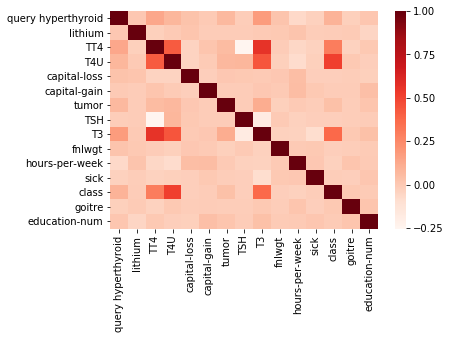

In [42]:
sns.heatmap(corr_matrix, cmap='Reds')

As we can see from the heatmap above, there are positive and negative correlations (dependencies) among many hormone levels:
> 1) **TT4** correlates with **T4U** (which is logical, because TT4 is total T4 and T4U - unbound part of TT4;  
> 2) **TT4** also strongly correlates with **T3**, because T3 is mostly produced from T4, so usually the more T4 we have, the more T3 will be present;  
> 3) **TT4** has moderate correlation with **class** field (which is our diagnosis), but it _has_ that correlation, which already is important;  
> 4) **TT4** has negative correlation with **TSH**, which fully matches with medical information on Thyroid hormones production: The less T4 human organism detects, the more TSH hormone it will produce to force Thyroid gland to increase T4 synthesis. **Same** applies for **T3** and **TSH** levels respectively, but not directly - level of T3, as we already mentioned before, depends on the level of T4, so T3 in this case could be called a "secondary" hormone;  
> 5) **T4U** also correlates with **T3** because of reasons, described earlier;  
> 6) **The most important indicators** are strong and moderate correlations between **class** and **T4U**, **class** and **T3** respectively, which could really help us to indicate, if our patient is healthy or not.  

Now, let's proceed to some distributions and correlations, presented by two- and three-category graphs. The data is still unclean, so there will be many outliers. It will be fixed in further parts of project, but now we use our data "as is".

First, let's get some distributions on all hormone columns + diagnosis:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249CEFAFAC8>,
      dtype=object)

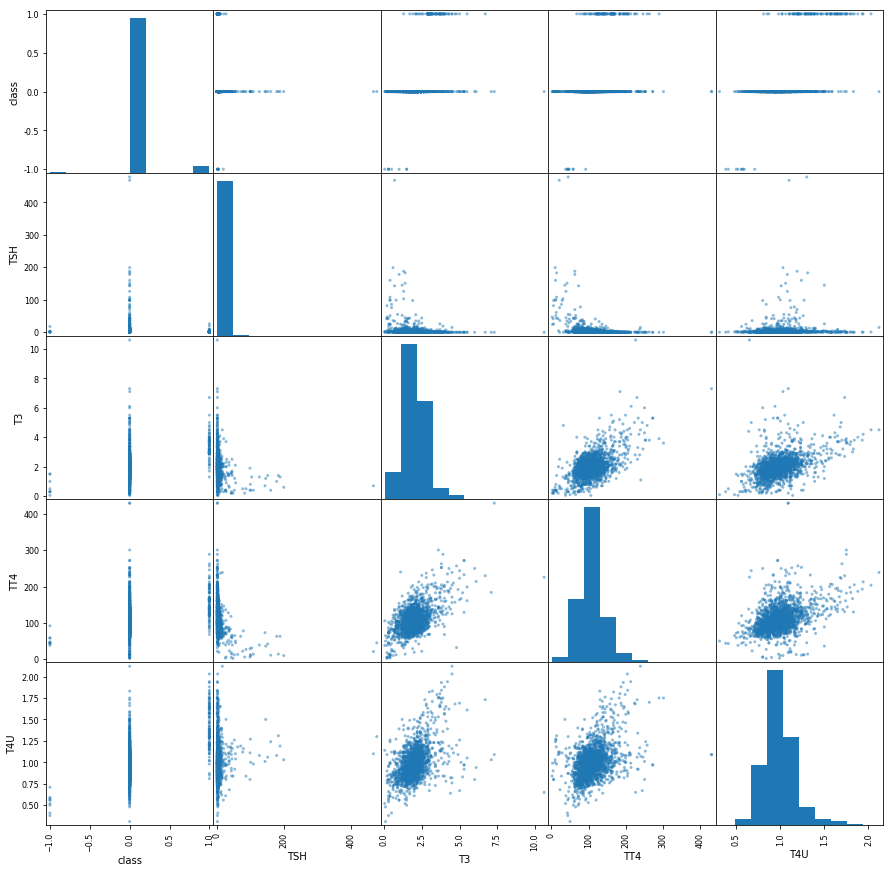

In [43]:
pd.scatter_matrix(df_corr[['class','TSH','T3','TT4','T4U']], figsize = (15, 15))

And then proceed to individual correlations:

1. Dependency between diagnosis and TT4 levels:

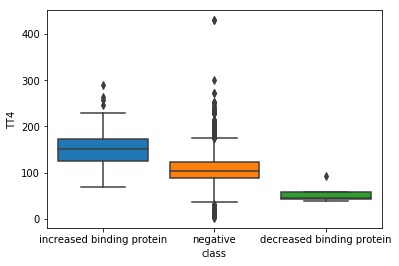

In [44]:
sns.boxplot(x="class", y="TT4", data=df_other,saturation=True)

2. Between diagnosis and level of T4U:

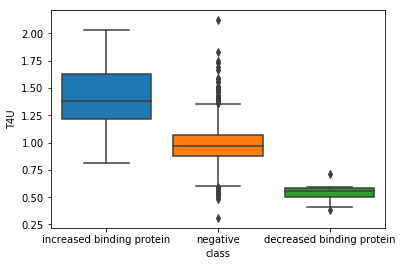

In [45]:
sns.boxplot(x="class", y="T4U", data=df_other,saturation=True)

3. Between diagnosis and T3:

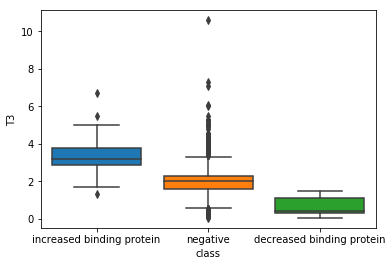

In [46]:
sns.boxplot(x="class", y="T3", data=df_other,saturation=True)

From the graphs above, you can see **specific hormone distribution**, with the results of diagnosis, but will there be any results for TSH levels, unseen from the heatmap? Let's try to see. 

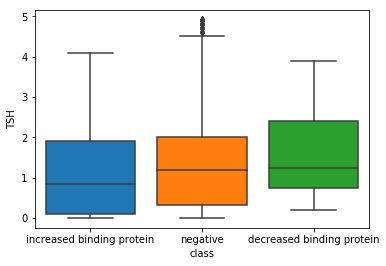

In [47]:
sns.boxplot(x="class", y=df_other[(df_other["TSH"]<5)]['TSH'], data=df_other,saturation=True)

Unfortunately due to many different values and dirtiness of data, there is no real way to reliably check if this is a correlation or just a dirtiness-affected distribution, so let's proceed further.

Free Thyroxine index won't help us much, as we see here, at least, for now:

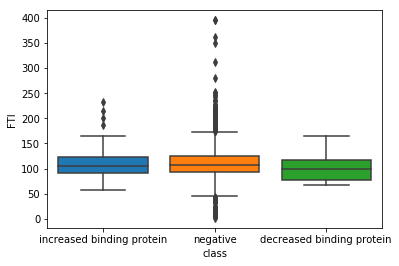

In [48]:
sns.boxplot(x="class", y=pd.to_numeric(df_other["FTI"],errors='coerce'), data=df_other,saturation=True)

Now, let's move to graphs, which could provide us with more demonstrative visual data:

First, dependency between TT4 and T4U levels and their affection on diagnosis.

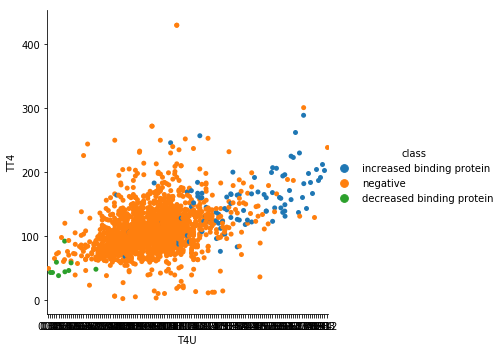

In [49]:
sns.catplot(x="T4U",y="TT4",hue='class',data=df_other)

As we may see, the surely is rather clean dependency between diagnosis and T4 levels, as we told before, but correlation between total amount and T4 and free T4 could also be representative in some way.

Same for T3 and T4U - there also is clear spot of normal values and outlying hypo- and hyperfunctions, but still needs to be cleaned:

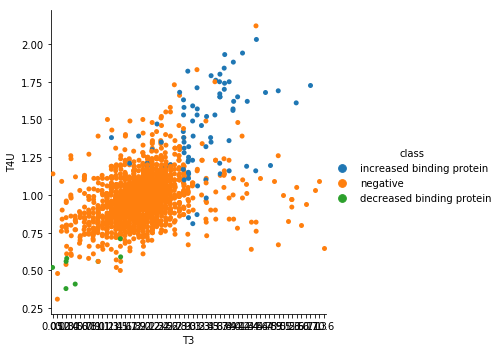

In [50]:
sns.catplot(x="T3",y="T4U",hue='class',data=df_other)

Because of current dirtiness of TSH and other levels it is hard to diagnose adequate correlations between TSH and T4U, represented in current type of graph, but after cleaning we shall try again:

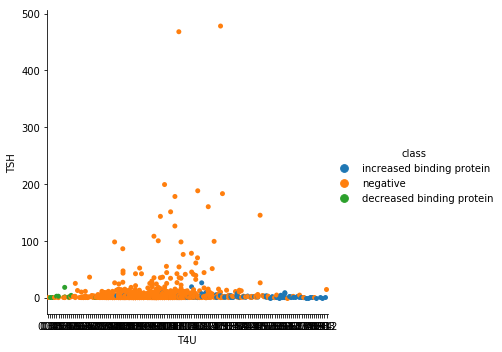

In [51]:
sns.catplot(x="T4U",y="TSH",hue='class',data=df_other)

# Formulated hypotheses - Statistically confirmed

## The First hypothesis

The first hypothesis:    
>**Is there any correlation between TSH & T4U hormone levels?**  

Let's look at it using a **T test**.

Text(0.5,1,'TSH & T4U dependendies')

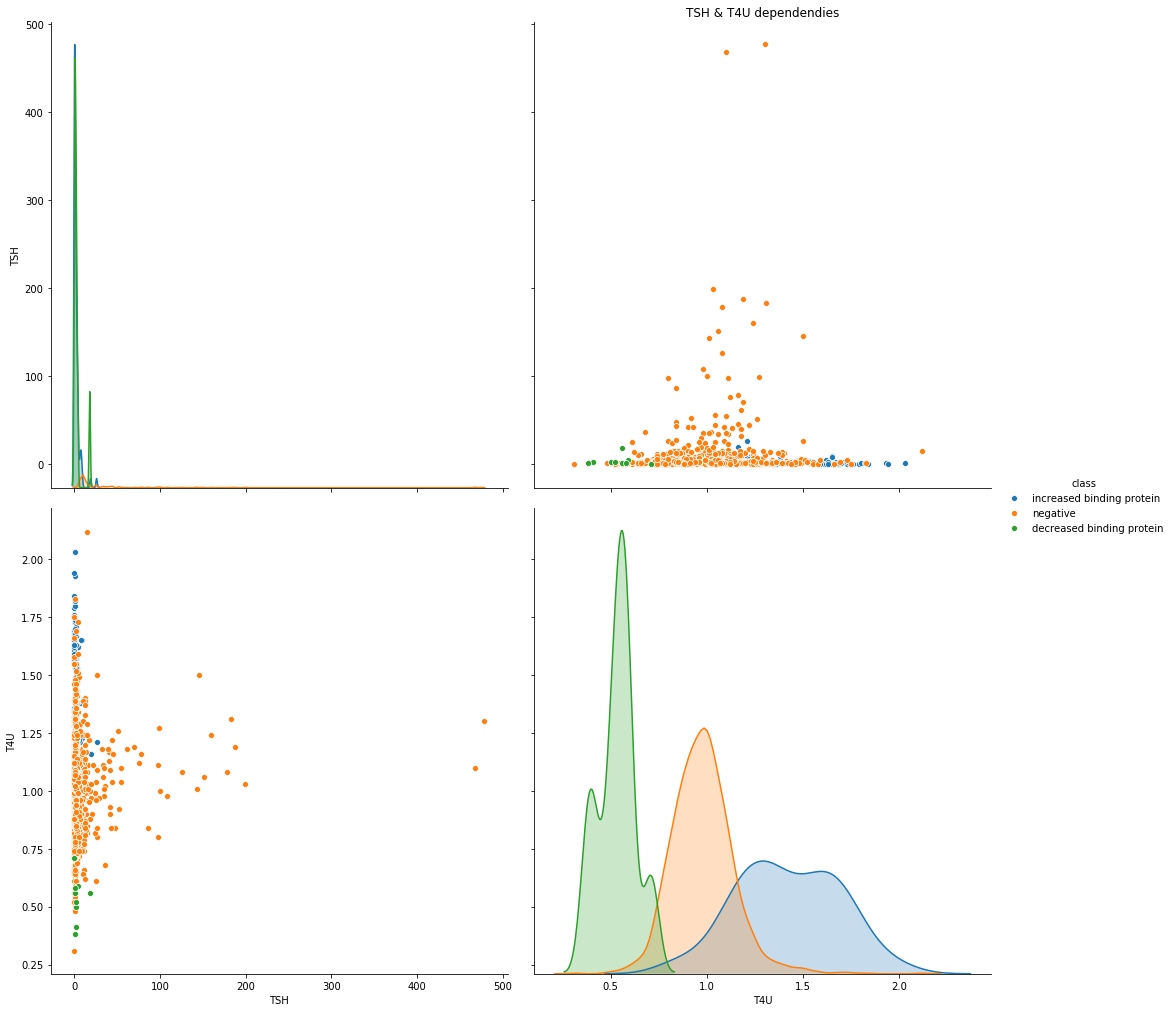

In [52]:
data = df_other[["TSH","T4U", "class"]].dropna()
sns.pairplot(data,hue="class",height=7)
plt.title("TSH & T4U dependendies")

As we can see there are some **dependencies beetwen TSH and T4U**, mainly in increased and decreased binding protein. Pairplot clearly shows high levels of TSH and low levels of T4U which is called **hypothyroidis** and vice versa - **hyperthyroidis**.

As we suppose there is a correlation between hormones so we have to choose **paired T-test**. But first we need to check distribution of each levels.

***The hypothesis level of confidence is p = 0.05***

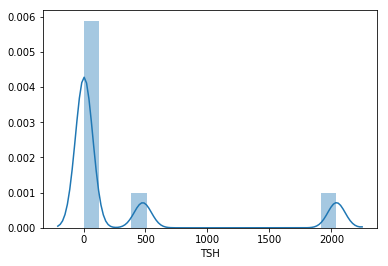

In [53]:
TSH = df_other["TSH"].dropna()
sns.distplot(TSH.describe())

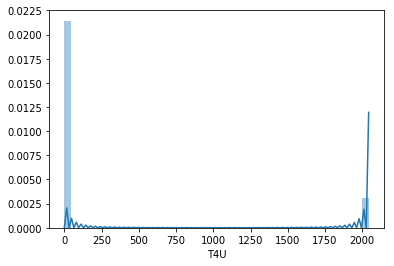

In [54]:
T4U = df_other["T4U"].dropna()
sns.distplot(T4U.describe())

It is very clear even for a laic that graph distributions are roughly **right skewed** neglecting outliers. Thus, we need to normalize it.

In [55]:
#Function that clears outliers
def normalize(data):
    q1 = data.quantile(0.25) - 1.5 * stats.iqr(data)
    q2 = data.quantile(0.75) + 1.5 * stats.iqr(data)
    
    #We return filter
    return data[(data > q1) & (data < q2)]

In [56]:
TSH = normalize(TSH)
sns.distplot(TSH)

AttributeError: 'Series' object has no attribute 'iqr'

In [57]:
T4U = normalize(T4U)
sns.distplot(T4U)

AttributeError: 'Series' object has no attribute 'iqr'

From now, we can see almost **perfect** Normal distribution for T4U and **smooth right skewed** for TSH hormone level.

Text(0.5,1,'TSH QQ-plot')

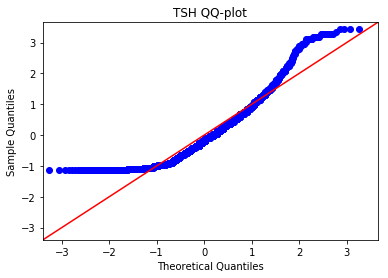

In [166]:
_= sm.ProbPlot(TSH,fit=True).qqplot(line='45')
plt.title("TSH QQ-plot")

Text(0.5,1,'T4U QQ-plot')

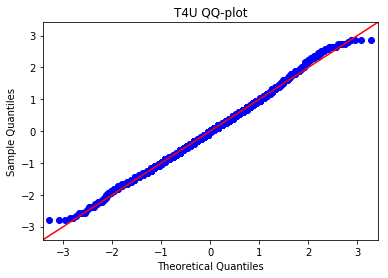

In [167]:
_ = sm.ProbPlot(T4U, fit=True).qqplot(line='45')
plt.title("T4U QQ-plot")

In [1]:
T4U = T4U[:1824]
stats.ttest_rel(a=TSH,b=T4U)

NameError: name 'T4U' is not defined

### The first hypothesis conclusion

So our hypothesis -> *the correlation between TSH & T4U* is **statistically significant** as result of p-value that is far less than 0.05

## The Second hypothesis

Let's look at T3 levels affected by TSH.
The next hypothesis:    
>**Is there any correlation between TSH and T3 levels?**

Text(0.5,1,'TSH & T3 dependencies')

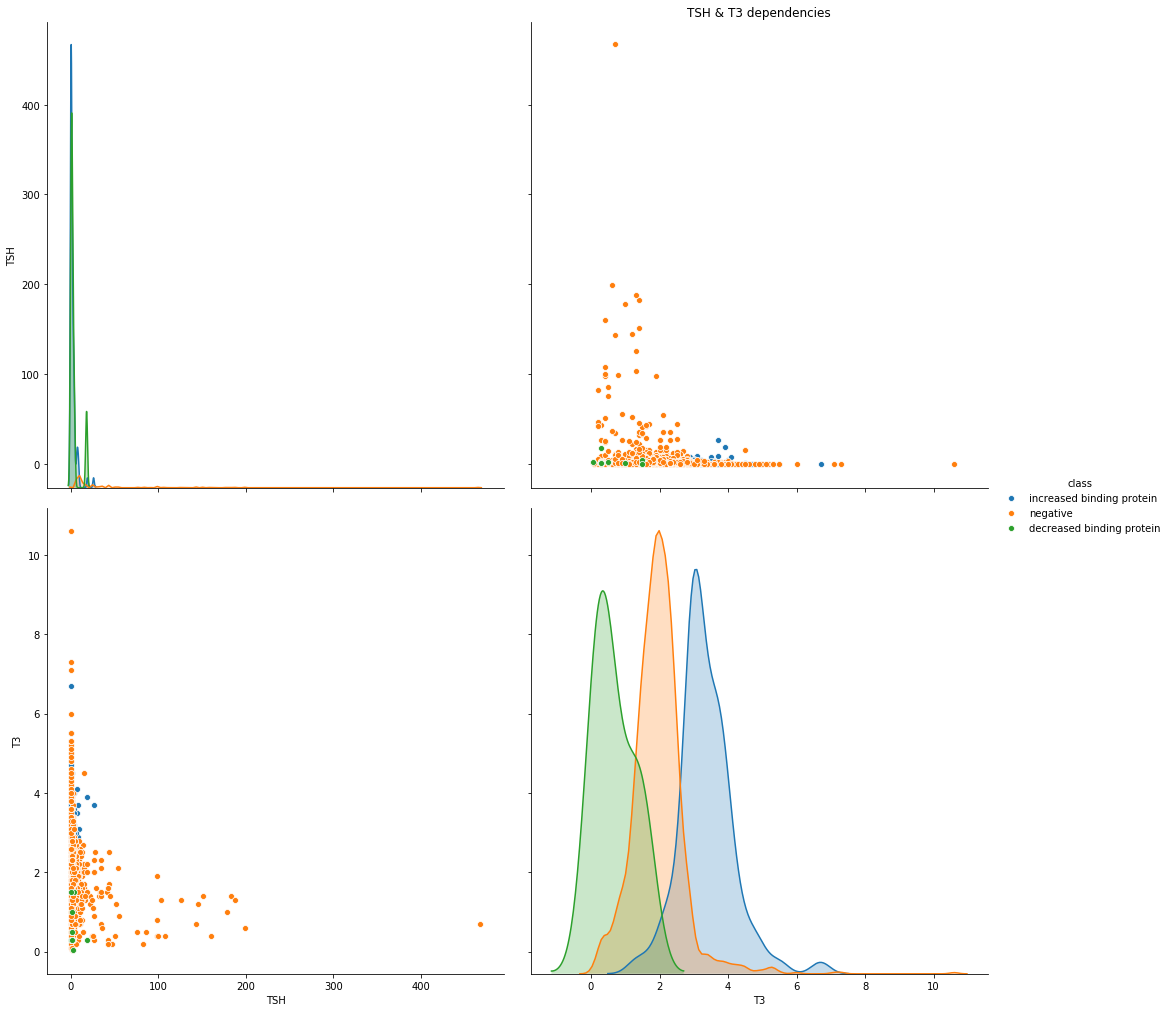

In [169]:
data = df_other[["TSH", "T3", "class"]].dropna()
sns.pairplot(hue = "class", data = data, height = 7)
plt.title("TSH & T3 dependencies")

As we can see there are some **dependencies beetwen TSH and T3**, mainly in increased and decreased binding protein. Pairplot clearly shows high levels of TSH and low levels of T3 which is called **hypothyroidis** and vice versa - **hyperthyroidis**.
This is almost the same as pairplot for T4U hormone. Despite the fact pairplots look very similar, T3 and T4U are different hormones.

As we suppose a correlation between hormones so we have to choose **paired T-test**. But first we need to check distribution of each levels.

***The hypothesis level of confidence is p = 0.05***

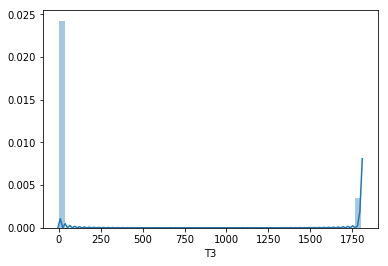

In [180]:
T3 = df_other["T3"].dropna()
TSH = df_other["TSH"].dropna()
TSH = normalize(TSH)
sns.distplot(T3.describe())

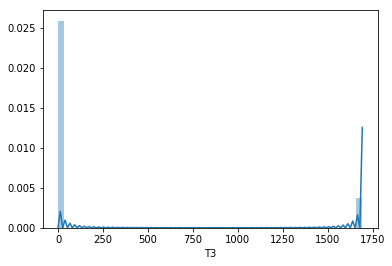

In [181]:
T3 = normalize(T3)
sns.distplot(T3.describe())

Text(0.5,1,'T3 levels')

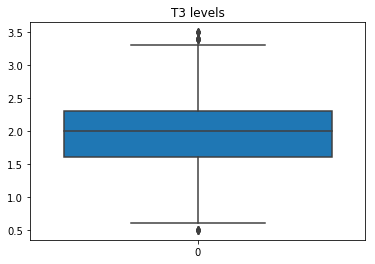

In [182]:
sns.boxplot(data=T3,saturation=True)
plt.title("T3 levels")

T3 levels before and after normalization have **the same shape** of distribution.

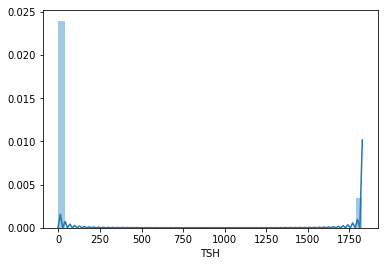

In [183]:
sns.distplot(TSH.describe())

Text(0.5,1,'TSH levels')

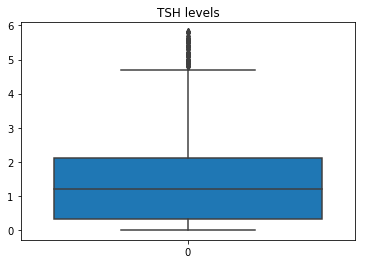

In [184]:
sns.boxplot(data=TSH,saturation=True)
plt.title("TSH levels")

**TSH** levels are left skewed, with few outliers. Let's check QQ-plots for TSH & T3

Text(0.5,1,'T3 QQ-plot')

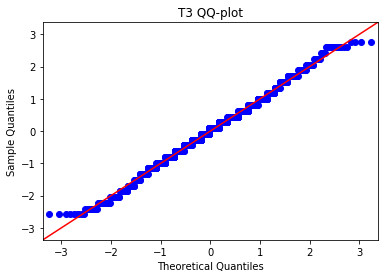

In [185]:
_= sm.ProbPlot(T3,fit=True).qqplot(line='45')
plt.title("T3 QQ-plot")

Text(0.5,1,'TSH QQ-plot')

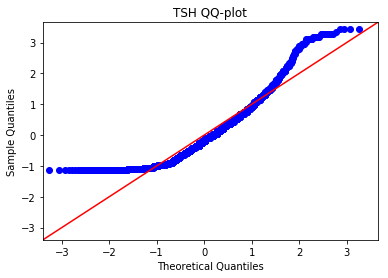

In [186]:
_ = sm.ProbPlot(TSH,fit=True).qqplot(line="45")
plt.title("TSH QQ-plot")

In [187]:
#T test seeks to have the same number of rows, so we cut the tail of TSH
TSH = TSH[:len(T3)]

In [188]:
stats.ttest_rel(a=TSH,b=T3)

Ttest_relResult(statistic=-15.831545488405196, pvalue=9.590380479920326e-53)

### The second hypothesis conclusion

Our second hypothesis -> *the correlation between TSH & T3* is **statistically significant** as result of p-value that is the same as *Hypothesis \#1* far less than 0.05

## Other interesting data

Also, just to gather a bit more possibly interesting data - a distribution of healthy and ill people between countries:

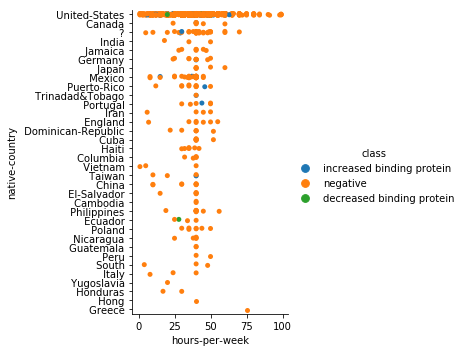

In [44]:
sns.catplot(x="hours-per-week",y="native-country",hue='class',data=df_other)

There is almost no correlation between working hours per week and diagnosis, but maybe that'll change in future analysis.

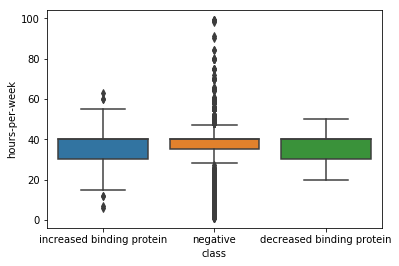

In [45]:
sns.boxplot(x="class",y="hours-per-week",data=df_other.drop(102))

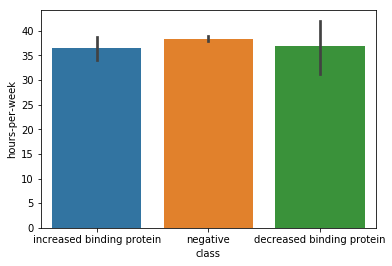

In [46]:
sns.barplot(x="class",y="hours-per-week",data=df_other.drop(102))

But still we are able to get some data from working hours and diagnois dependencies: People with increased binding protein (e.g., hyperfunction) usually work between 4-5 and 65 hours per week, when people with hypofynction (decreased binding protein) usually work between 20 and 55 hours per week. But still, there are too few values for hypofunction to be reliable and representative enough to make strong assumptions.

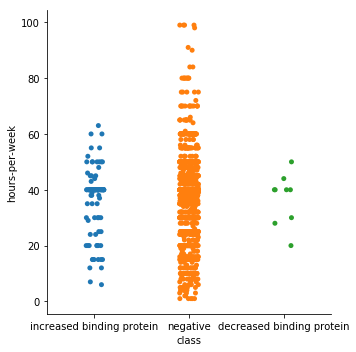

In [47]:
sns.catplot(x="class",y="hours-per-week",data=df_other.drop(102))

Dependency between tumor and patient's native country (with diagnosis, of course). "-1" represents hypofunction, "0" - healthy, "1" - hyperfunction:

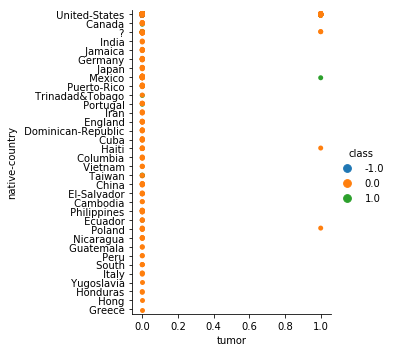

In [48]:
sns.catplot(x="tumor",y="native-country",hue='class',data=df_corr)

Same for goitre:

<p style="font-family: Arial; font-size:2.95em; color:indigo; font-style:bold"><br>
Conclusion</p><br>

In this exploratory analysis we have performed a brief view on the data and mainly identified faulty mistakes as well as correlation between hormones using **T-test** and **Pearson correlation**.  
We've found out a lot of new dependencies among many columns in both datasets and our focus was to put emphasis on hormone levels at most.

In the next step, we will preprocess data with many sophisticated functions to successfully **predict a diagnosis** based on the H-levels.